In [64]:
import os
cwd = os.getcwd()
assert os.path.join(
    os.path.basename(os.path.dirname(cwd)),
    os.path.basename(cwd)) == 'chromatic-encoding/viz', cwd

In [70]:
S3ROOT="s3://sisu-datasets/ce-0"
for encoding in ['ce', 'ft']:
    for i in [512, 1024, 2048]:
        fname = f"url.{encoding}.{i}.wd.tar"
        
        ! cd data && aws s3 cp {S3ROOT}/nn/{fname} .
        ! tar xf data/{fname} -C data
        
        to_rm = ' '.join(
            'data/' + fname[:-len('tar')] + suffix
            for suffix in ['tar', 'log']
        )
        
        ! rm {to_rm}

download: s3://sisu-datasets/ce-0/nn/url.ce.512.wd.tar to ./url.ce.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.1024.wd.tar to ./url.ce.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.2048.wd.tar to ./url.ce.2048.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.512.wd.tar to ./url.ft.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.1024.wd.tar to ./url.ft.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.2048.wd.tar to ./url.ft.2048.wd.tar


In [74]:
import json, glob
df = [json.load(open(f)) for f in glob.glob('data/*.json') if '4096' not in f]
import pandas as pd
df = pd.DataFrame.from_records(df)
df['memory_gb'] = df['allocated_bytes.all.peak'] / 1024 / 1024 / 1024 # GB
df

,active_bytes.all.peak,allocated_bytes.all.peak,config,dataset,device,encoding,inactive_split_bytes.all.peak,modelname,num_params,num_test,...,test_epoch_logloss,test_logloss,train_acc,train_acc_best_const,train_auc,train_epoch_logloss,train_logloss,train_sec,truncate,memory_gb
0,644129792,644129792,"{'epochs': 10, 'lr': 0.00227026080407016, 'wd'...",url,cuda,ft,334972928,wd,559424,718839,...,"[0.08098498092508237, 0.06016495496625305, 0.0...",0.047071,0.983547,0.673549,0.997569,"[0.2740916211126197, 0.10079139560206324, 0.09...",0.050446,832.928701,2048,0.599893
1,831980544,831980544,"{'epochs': 10, 'lr': 0.004244220162924416, 'wd...",url,cuda,ce,353678336,wd,47521975,718839,...,"[0.10161139697633481, 0.07994259008489707, 0.0...",0.057937,0.988286,0.673549,0.999008,"[0.26971613949162476, 0.12490642562017336, 0.1...",0.041955,968.647514,2048,0.774842
2,161156096,161156096,"{'epochs': 10, 'lr': 0.004244220162924416, 'wd...",url,cuda,ft,82880000,wd,140096,718839,...,"[0.07893292372431769, 0.07288075210186915, 0.0...",0.056104,0.981123,0.673549,0.997458,"[0.2615105047530889, 0.10846913493123538, 0.10...",0.055947,372.961520,512,0.150088
3,349111296,349111296,"{'epochs': 10, 'lr': 0.004244220162924416, 'wd...",url,cuda,ce,84576256,wd,47128759,718839,...,"[0.12006971080828052, 0.09858625664525135, 0.0...",0.073260,0.983718,0.673549,0.998458,"[0.37499612289616185, 0.15197473225867209, 0.1...",0.059459,393.121121,512,0.325135
4,322147328,322147328,"{'epochs': 10, 'lr': 0.004244220162924416, 'wd...",url,cuda,ft,40795648,wd,279872,718839,...,"[0.07375390036154202, 0.06590072050389556, 0.0...",0.050542,0.983059,0.673549,0.997560,"[0.22082226369552704, 0.10379680710980016, 0.0...",0.051994,476.604424,1024,0.300023
5,510067712,510067712,"{'epochs': 10, 'lr': 0.004244220162924416, 'wd...",url,cuda,ce,43559424,wd,47259831,718839,...,"[0.1137398958598775, 0.09021201566155825, 0.08...",0.066995,0.985248,0.673549,0.998448,"[0.27476469446451235, 0.13451365667585197, 0.1...",0.054078,499.670664,1024,0.475038


In [75]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

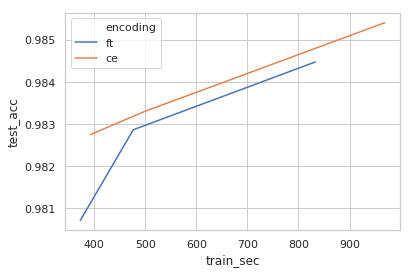

In [76]:
# x = 
g = sns.lineplot(data=df, x='train_sec', y='test_acc', hue='encoding')

#handles, labels = g.get_legend_handles_labels()
#g.legend(handles[1:], labels[1:], loc='center left', bbox_to_anchor=(1.05, 0.5))
g.legend()
#plt.savefig('out/frontier.pdf',  bbox_inches='tight')

plt.show()

{'epochs': 10, 'lr': 0.00227026080407016, 'wd': 0.0021873960541613263}


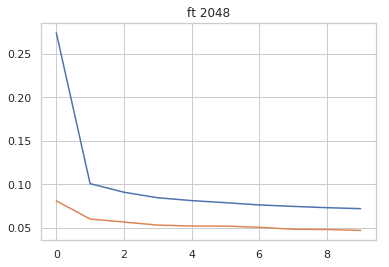

{'epochs': 10, 'lr': 0.004244220162924416, 'wd': 0.00011842729505689437}


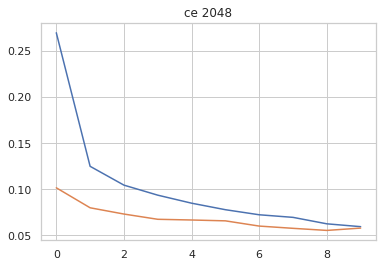

{'epochs': 10, 'lr': 0.004244220162924416, 'wd': 0.00011842729505689437}


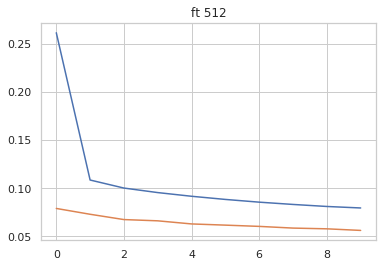

{'epochs': 10, 'lr': 0.004244220162924416, 'wd': 0.00011842729505689437}


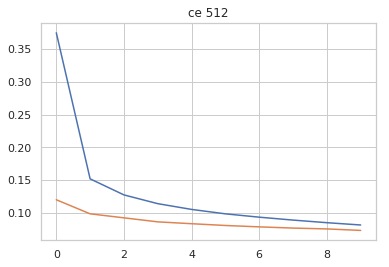

{'epochs': 10, 'lr': 0.004244220162924416, 'wd': 0.00011842729505689437}


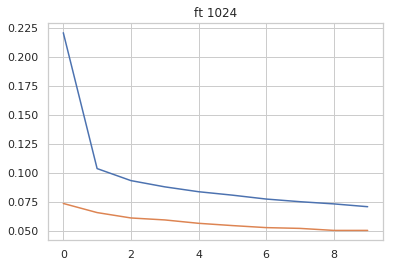

{'epochs': 10, 'lr': 0.004244220162924416, 'wd': 0.00011842729505689437}


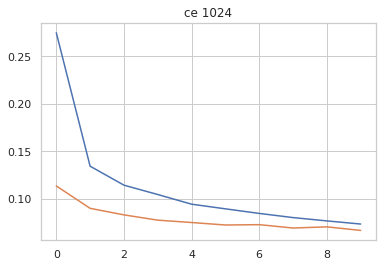

In [77]:
for row in df.itertuples():
    print(row.config)
    plt.plot(row.train_epoch_logloss, label='train')
    plt.plot(row.test_epoch_logloss, label='test')
    plt.title(row.encoding + ' ' + str(row.truncate))
    plt.show()

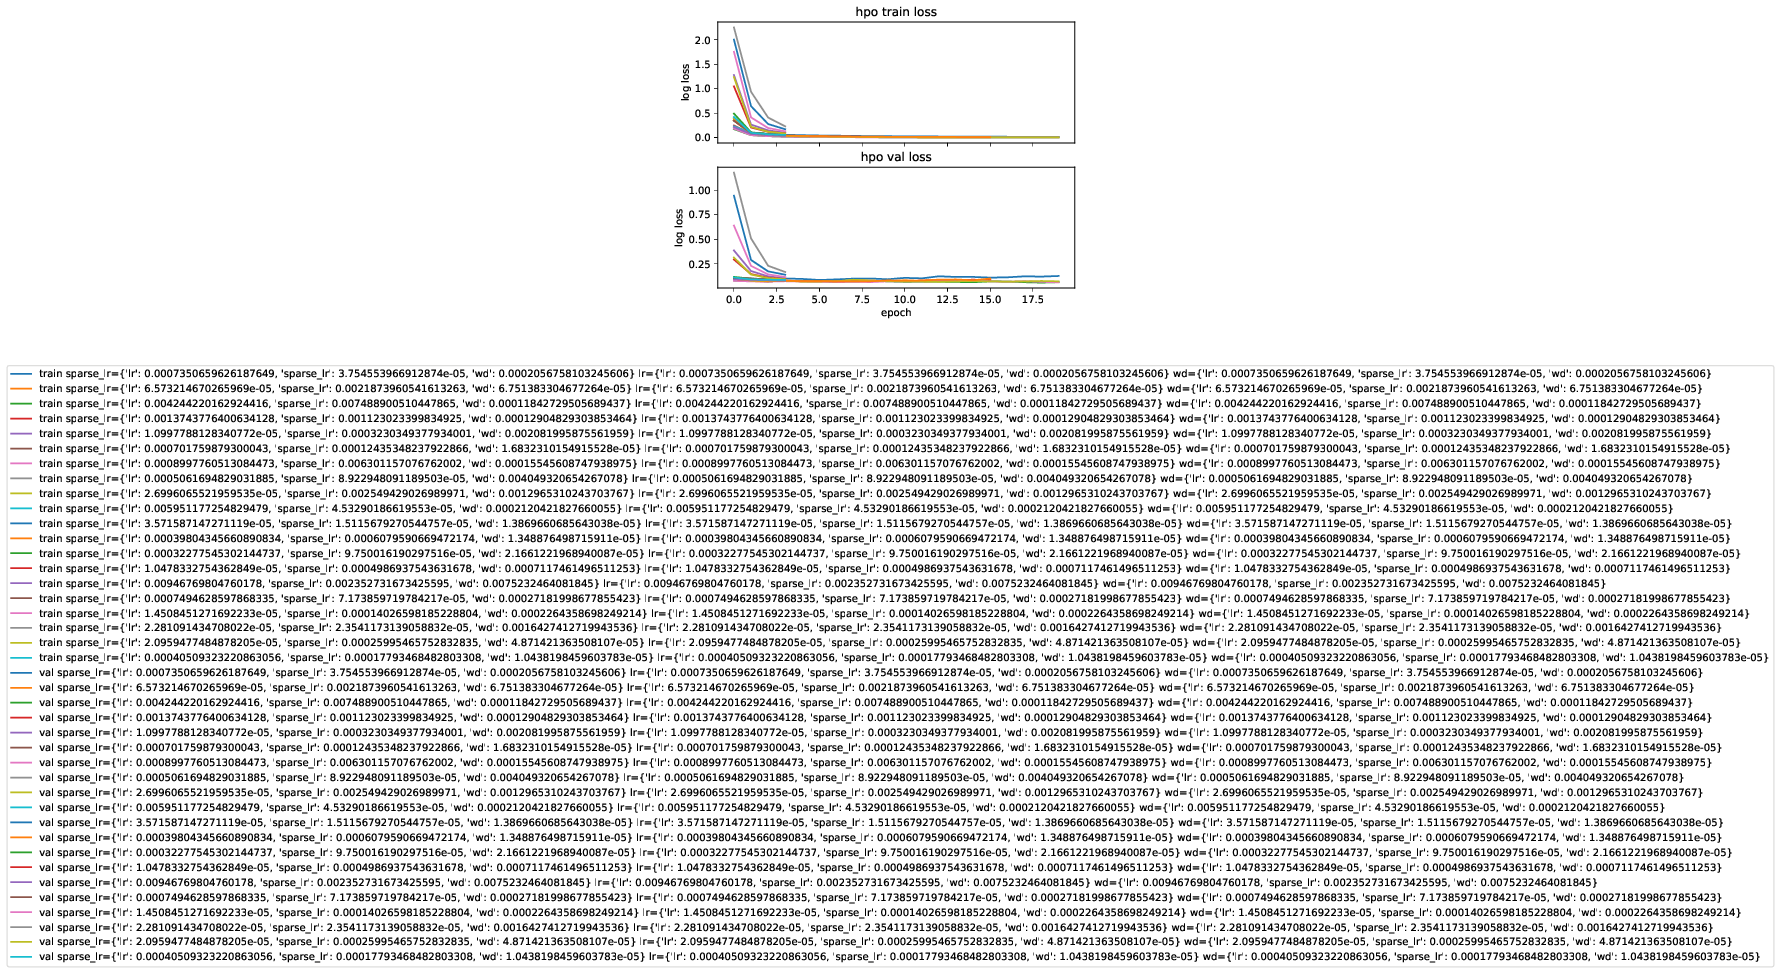

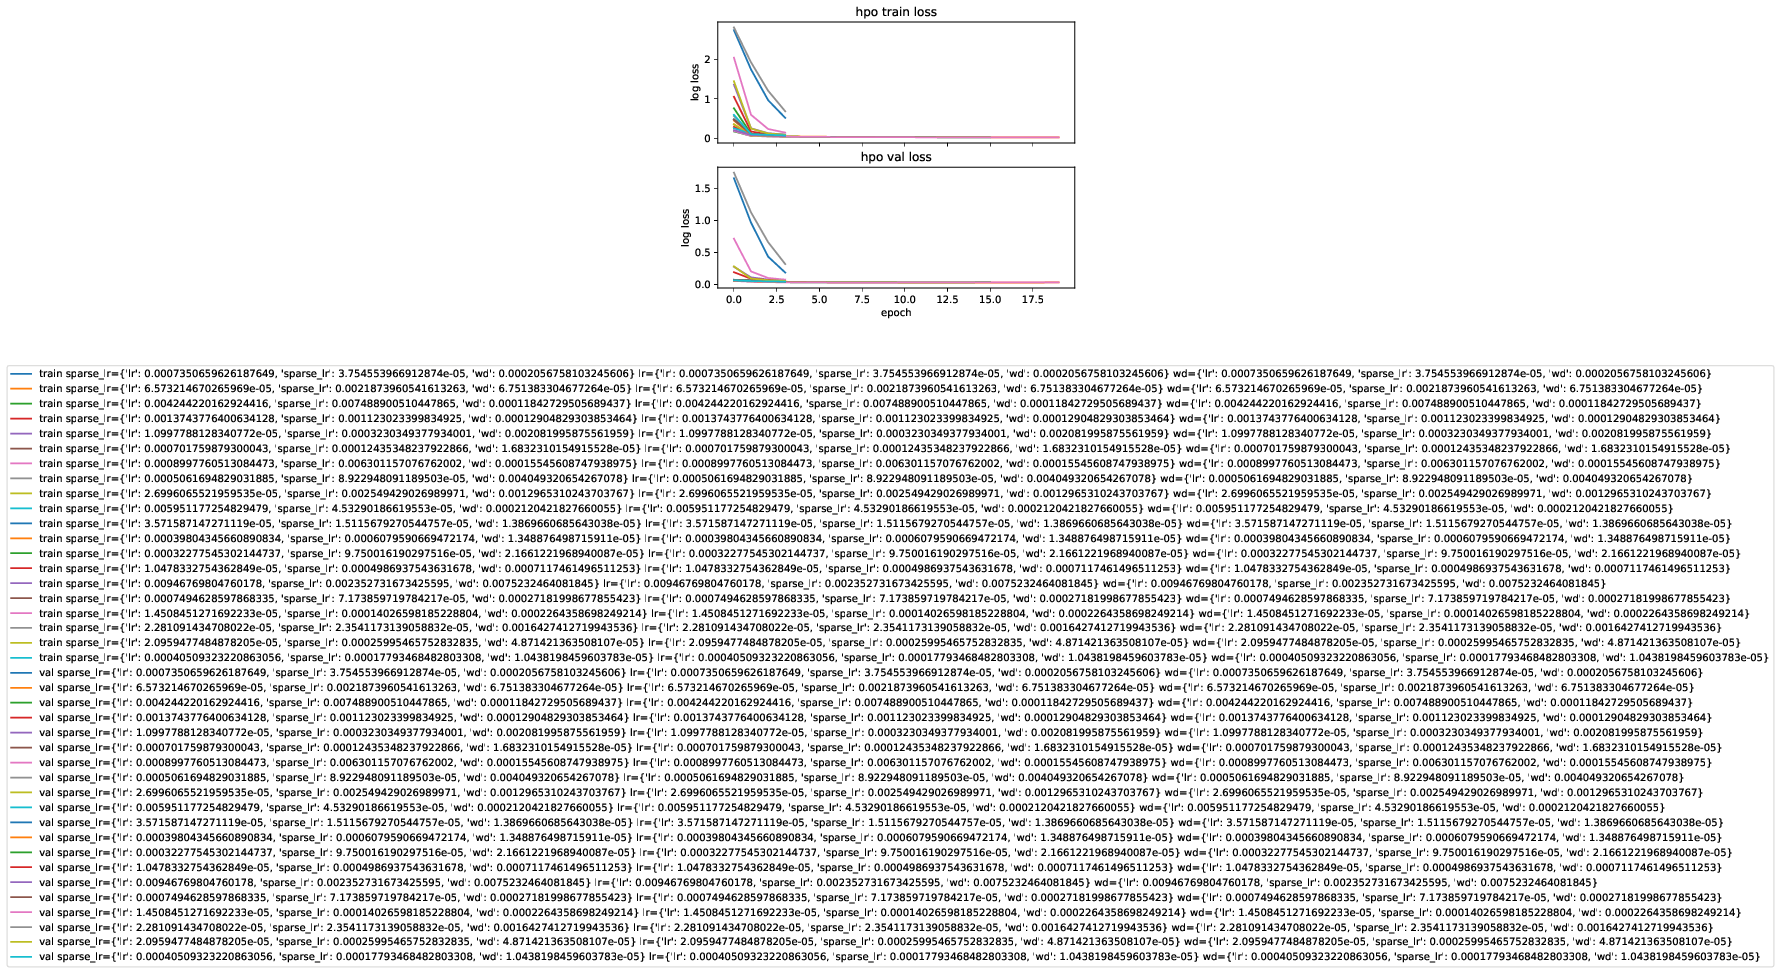

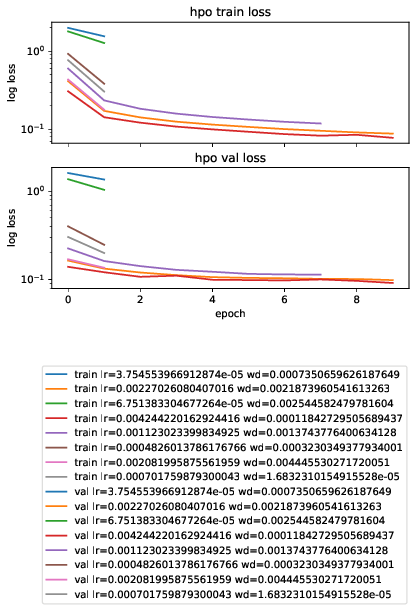

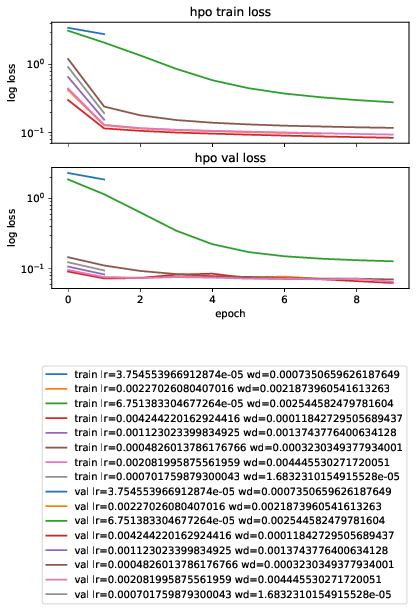

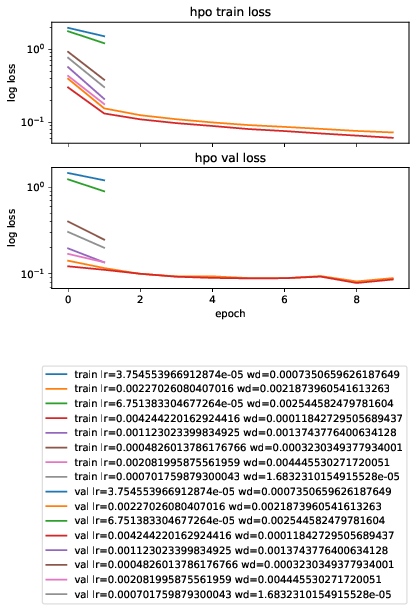

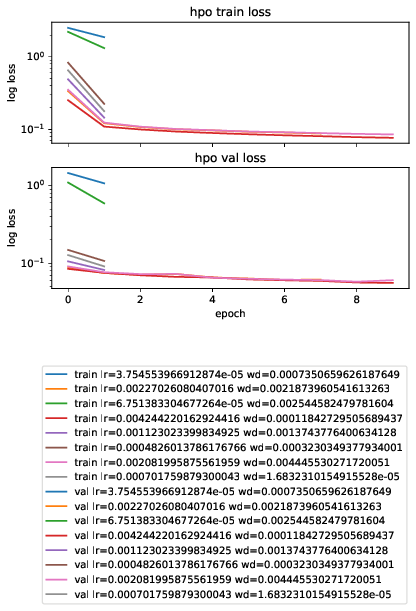

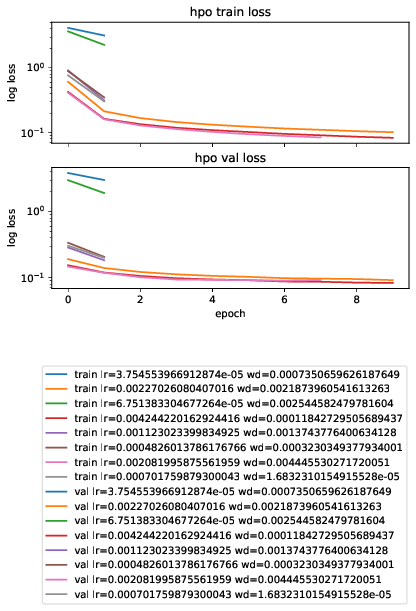

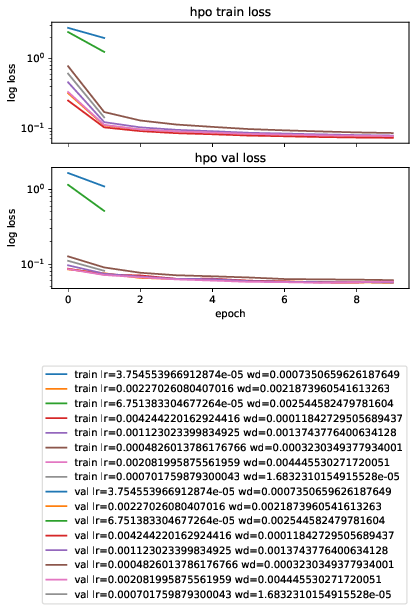

In [78]:
from wand.image import Image as WImage
from IPython.display import display
for f in glob.glob('data/*.pdf'):
    display(WImage(filename=f))